In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
from tabulate import tabulate
import random
import tensorflow as tf

In [9]:
from sklearn.preprocessing import RobustScaler

df = pd.read_csv('F:/uit/AI/Finallllll/onlinefraud.csv')

Check collumn

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [11]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2008407,180,CASH_OUT,382085.74,C25189233,36050.08,0.00,C348313079,2189222.67,2571308.41,0,0
1605734,156,PAYMENT,32495.40,C1675902530,0.00,0.00,M905412568,0.00,0.00,0,0
1589889,155,CASH_IN,205101.30,C2004051167,4452719.46,4657820.76,C392247094,595651.67,390550.37,0,0
4978788,352,CASH_OUT,23255.72,C1231061458,94368.00,71112.28,C1536332837,1055118.79,1078374.50,0,0
1321677,136,CASH_OUT,225029.76,C2104656525,0.00,0.00,C1839327509,589593.46,814623.22,0,0


Check Null (No missing value)

In [12]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Min Max Check

In [17]:
fraud_min_max = [
    ['amount', df.amount.min(), df.amount.max()],
    ['oldbalanceOrg', df.oldbalanceOrg.min(), df.oldbalanceOrg.max()],
    ['newbalanceOrig', df.newbalanceOrig.min(), df.newbalanceOrig.max()],
    ['oldbalanceDest', df.oldbalanceDest.min(), df.oldbalanceDest.max()],
    ['newbalanceDest', df.newbalanceDest.min(), df.newbalanceDest.max()],
    ['isFlaggedFraud', df.isFlaggedFraud.min(), df.isFlaggedFraud.max()],

    ['isFraud', df.isFraud.min(), df.isFraud.max()]

] 

print(
    tabulate(
        fraud_min_max,
        headers=['columns', 'min value', 'max value'],
        showindex=True,
        tablefmt='github',
        numalign='right'
    )
)

|    | columns        |   min value |   max value |
|----|----------------|-------------|-------------|
|  0 | amount         |           0 | 9.24455e+07 |
|  1 | oldbalanceOrg  |           0 |  5.9585e+07 |
|  2 | newbalanceOrig |           0 |  4.9585e+07 |
|  3 | oldbalanceDest |           0 | 3.56016e+08 |
|  4 | newbalanceDest |           0 | 3.56179e+08 |
|  5 | isFlaggedFraud |           0 |           1 |
|  6 | isFraud        |           0 |           1 |


Check Dublicate Values

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8,6)

  Univariate data visualization

In [20]:
df['step'].value_counts()
#Each of the 743 stages has a minimum of two occurrences.

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
725        4
655        4
246        4
662        2
112        2
Name: count, Length: 743, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_2356\3874918745.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='type', data=df, palette='PuBu')
C:\Users\HP\AppData\Local\Temp\ipykernel_2356\3874918745.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')


Text(0, 0.5, 'Number of transactions')

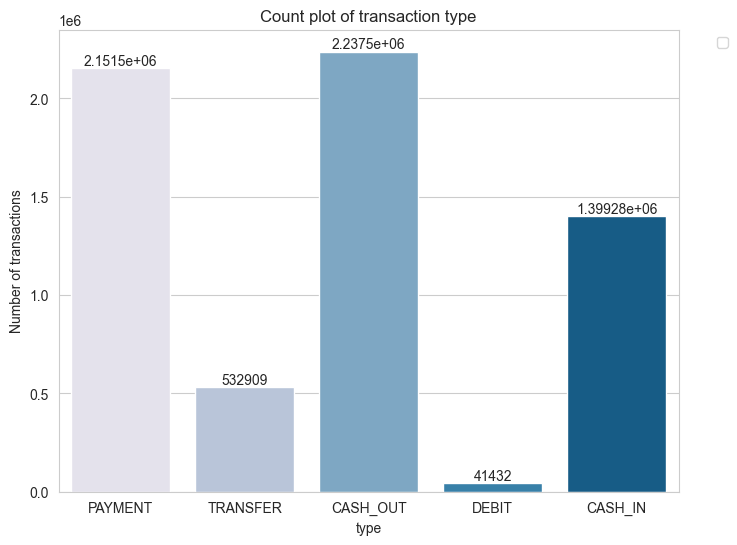

In [21]:
ax = sns.countplot(x='type', data=df, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of transaction type')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

In [ ]:
#The most prevalent transaction type is cash out, followed by payment, cash in, transfer, and debit.

Text(0.5, 1.0, 'Distribution of transaction amount')

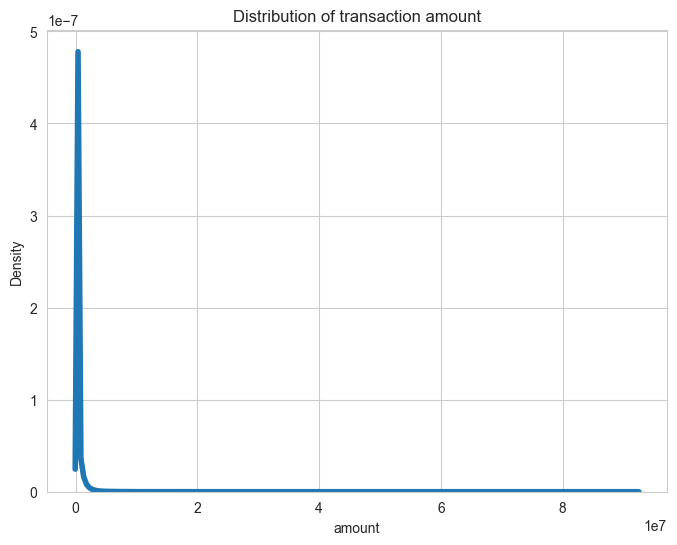

In [22]:
sns.kdeplot(df['amount'], linewidth=4)
plt.title('Distribution of transaction amount')

In [ ]:
#The distribution of transaction amounts is right skewed.
# This indicates that most values are clustered around the left tail of the distribution, with the longer right tail.
# (mode < median < mean)

In [23]:
df['nameOrig'].value_counts()

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
              ..
C1668034607    1
C992223106     1
C312737633     1
C1565612524    1
C1566511282    1
Name: count, Length: 6353307, dtype: int64

In [ ]:
#There are 6353307 initial customers, and every step has at least 1 occurrence.

Text(0.5, 1.0, 'Distribution of transaction amount')

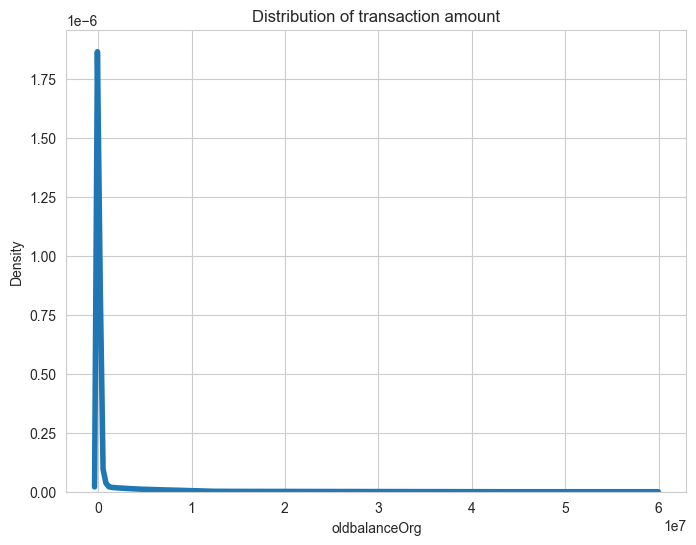

In [24]:
sns.kdeplot(df['oldbalanceOrg'], linewidth=4)
plt.title('Distribution of transaction amount')

In [ ]:
#The distribution of pre-transaction balances of the initial customers is right skewed.

Text(0.5, 1.0, 'Distribution of transaction amount')

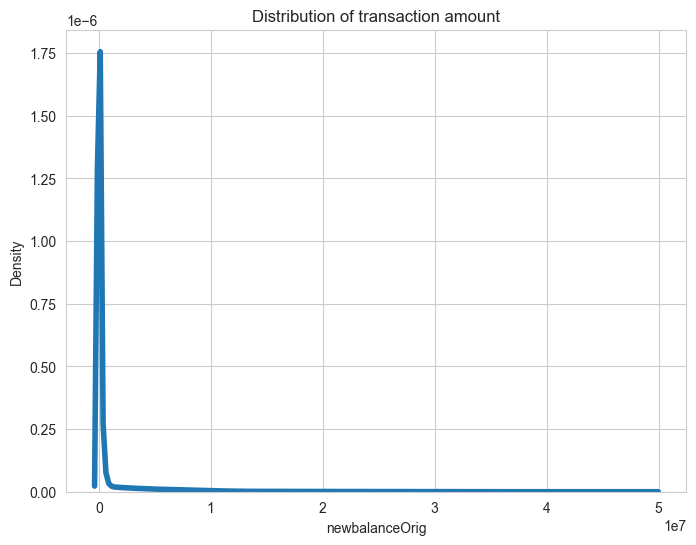

In [25]:
sns.kdeplot(df['newbalanceOrig'], linewidth=4)
plt.title('Distribution of transaction amount')

In [ ]:
#The distribution of post-transaction balances of the initial customers is right skewed.

Text(0.5, 1.0, 'Distribution of transaction amount')

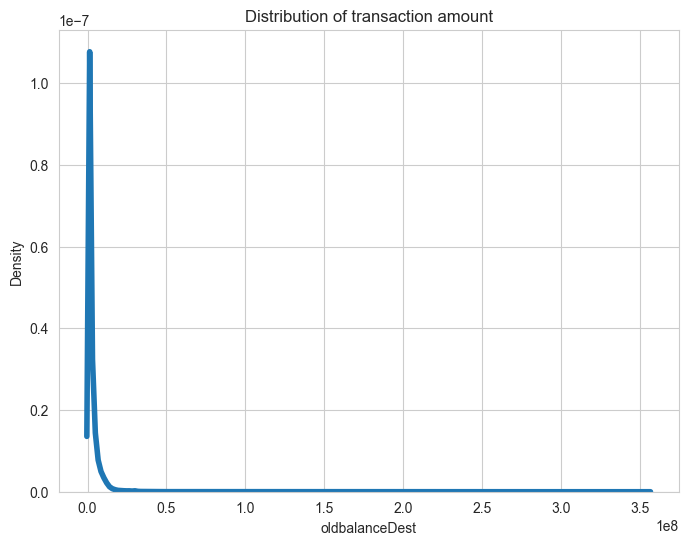

In [26]:
sns.kdeplot(df['oldbalanceDest'], linewidth=4)
plt.title('Distribution of transaction amount')

In [ ]:
#The distribution of pre-transaction balances of the recipient is right skewed.

Text(0.5, 1.0, 'Distribution of transaction amount')

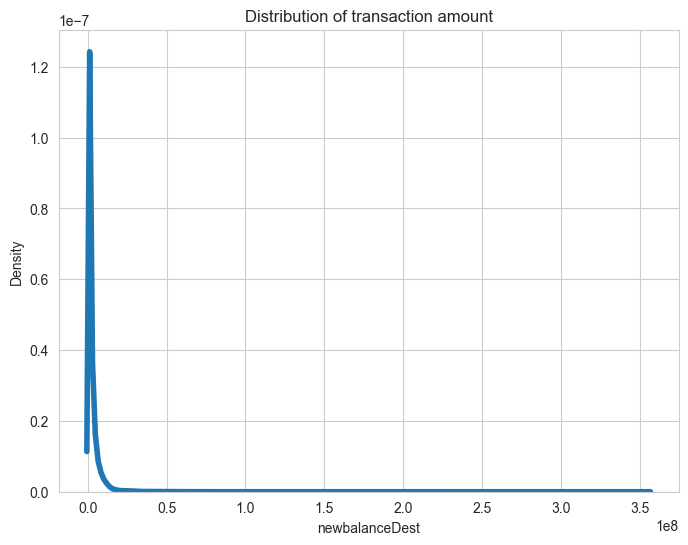

In [27]:
sns.kdeplot(df['newbalanceDest'], linewidth=4)
plt.title('Distribution of transaction amount')

In [ ]:
#The distribution of post-transaction balances of the recipient is right skewed.

C:\Users\HP\AppData\Local\Temp\ipykernel_2356\80623673.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='isFraud', data=df, palette='PuBu')


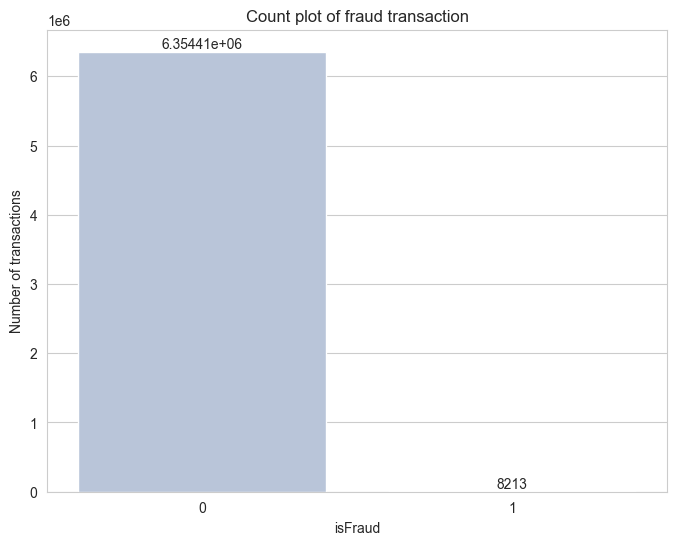

In [28]:
ax = sns.countplot(x='isFraud', data=df, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of fraud transaction')
plt.ylabel('Number of transactions')

del ax

In [ ]:
#There are much more non-fraudulent transactions than fraudulent transactions.

  Bivariate data visualization

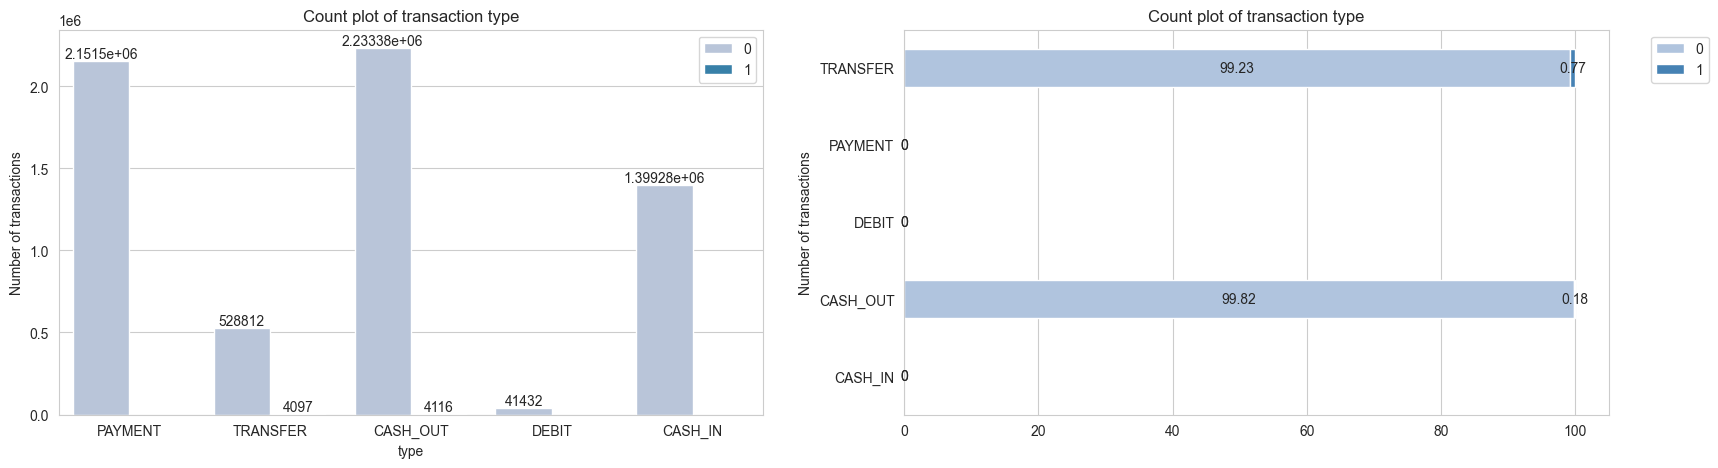

In [29]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.countplot(x='type', data=df, hue='isFraud', palette='PuBu', ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container)
ax[0].set_title('Count plot of transaction type')
ax[0].legend(loc='best')
ax[0].set_ylabel('Number of transactions')

df2 = df.groupby(['type', 'isFraud']).size().unstack()
df2.apply(lambda x : round(x/sum(x)*100, 2), axis=1).plot(kind='barh', stacked=True, color=['lightsteelblue', 'steelblue'], ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, label_type='center')
ax[1].set_title('Count plot of transaction type')
ax[1].legend(bbox_to_anchor=(1.05,1), loc='upper left')
ax[1].set_ylabel('Number of transactions')
ax[1].grid(axis='y')

In [ ]:
#Fraudulent transactions only occur in debit and transfer types.

Text(0, 0.5, 'Number of transactions')

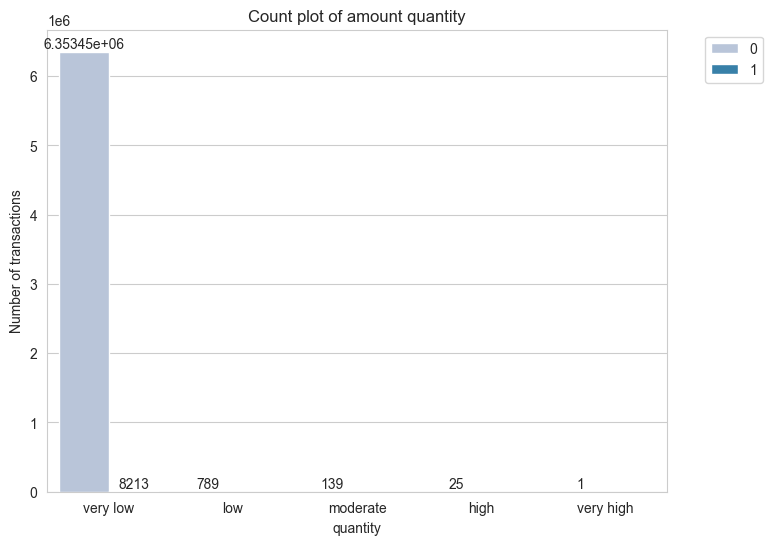

In [30]:
df['quantity'] = pd.cut(df['amount'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='quantity', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of amount quantity')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

In [ ]:
# All fraudulent transactions fall into the category of very low amounts.
# This suggests that in most cases, small transactions are more prone to fraudulent transactions.

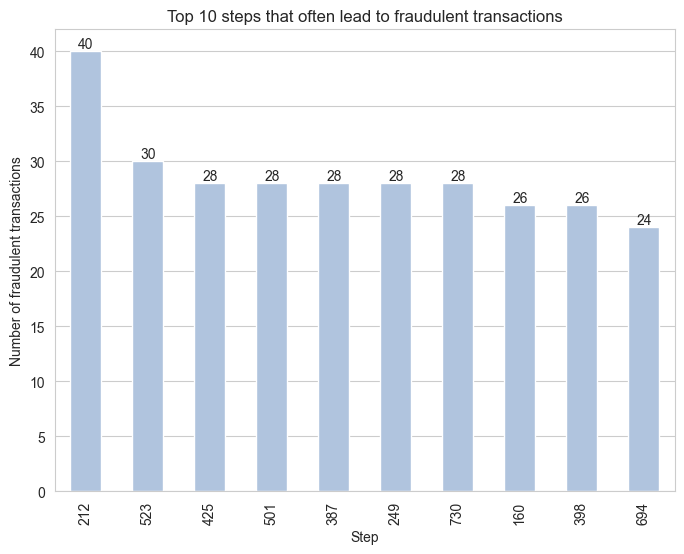

In [31]:
df1 = df[df['isFraud']==1]
df2 = df1['step'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 steps that often lead to fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Step')
plt.grid(axis='x')

del ax, df2

In [ ]:
# Step 212 has the highest number of fraudulent transactions, 40 cases.
# This indicates that Step 212 is the step that will most likely lead to fraudulent transactions.

Text(0.5, 0, 'Initial customers pre-transaction balance amount')

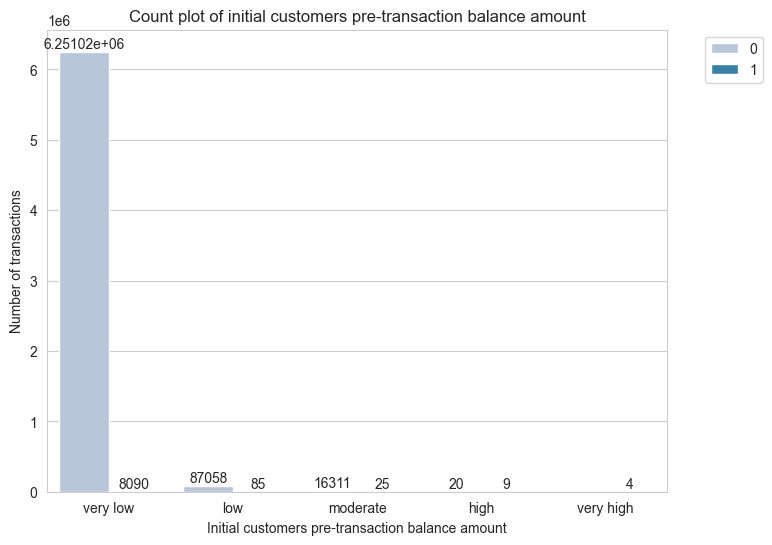

In [32]:
df['oldbalanceOrg_amt'] = pd.cut(df['oldbalanceOrg'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceOrg_amt', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of initial customers pre-transaction balance amount')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Initial customers pre-transaction balance amount')

In [ ]:
# Initial customers with very low pre-transaction balances has the highest number of fraudulent transactions.
# This means that initial customers with very low pre-transaction balances may be more likely to fall for a fraudulent transaction.

Text(0.5, 0, 'Recipient pre-transaction balance amount')

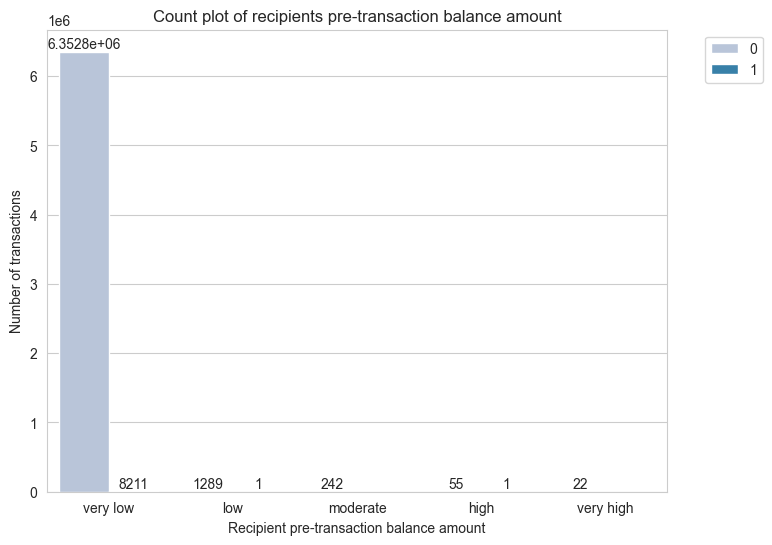

In [34]:
df['oldbalanceDest_amt'] = pd.cut(df['oldbalanceDest'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceDest_amt', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of recipients pre-transaction balance amount')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Recipient pre-transaction balance amount')

<!-- Recipients with very low pre-transaction balances has the highest number of fraudulent transactions.
This implies that recipients with very low pre-transaction balances may be more susceptible to fraudulent transactions. -->

  Multivariate data visualization


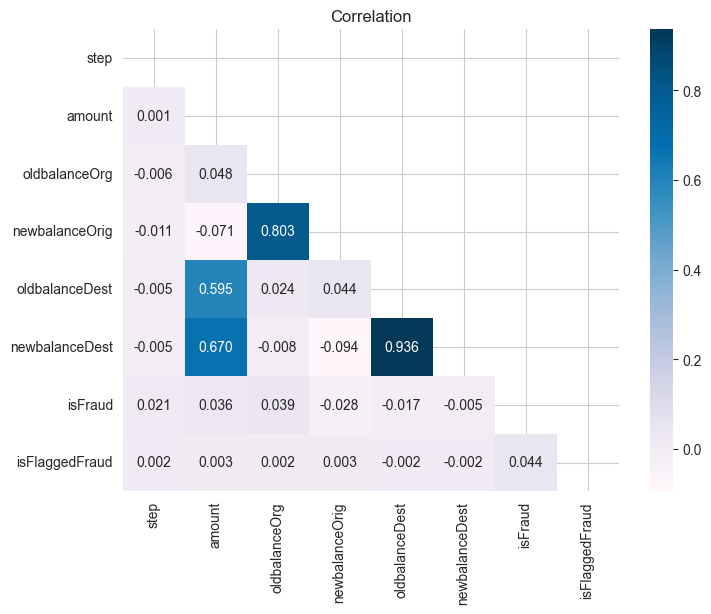

In [36]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate Spearman correlation matrix
corr_matrix = numeric_df.corr('spearman')

# Plot heatmap
sns.heatmap(corr_matrix, cbar=True, annot=True, mask=np.triu(np.ones_like(corr_matrix, dtype=bool)), fmt='.3f', cmap='PuBu')
plt.title('Correlation')
plt.show()

In [ ]:
# oldbalanceOrg and newbalanceOrig has strong positive relationship.
# oldbalanceDest and newbalanceDest has strong positive relationship.
# oldbalanceOrg and amount has weak positive relationship.
# newbalanceOrig and amount has moderate positive relationship.